In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Softmax

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [3]:
data_train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
X_test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
submit = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')

In [4]:
data_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data_train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [6]:
data_train['label'].unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6])

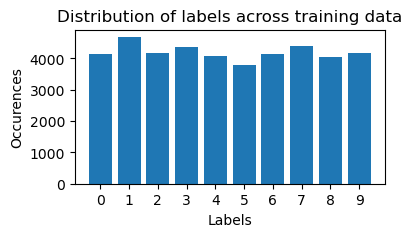

In [7]:
plt.figure(figsize=(4,2))
plt.hist(data_train['label'], bins=range(11), rwidth=0.8, align='left')
plt.xticks(range(10))
plt.title("Distribution of labels across training data")
plt.ylabel('Occurences')
plt.xlabel('Labels')
plt.show()

In [8]:
X_train = data_train.drop('label', axis=1)
y_train = data_train['label'].values

X_train = X_train/255
X_test = X_test/255

X_train = X_train.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)

**Model**

In [9]:
EPOCHS = 50

model_1 = keras.models.Sequential([
    Conv2D(64, (5, 5), padding='Same', activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (5, 5), padding='Same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(10),
    BatchNormalization(),
    Softmax()
])

model_2 = keras.models.Sequential([
    Conv2D(64, (5, 5), padding='Same', activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (5, 5), padding='Same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(100),
    BatchNormalization(),
    Dense(10),
    BatchNormalization(),
    Softmax()
])

model_3 = keras.models.Sequential([
    Conv2D(32, (5, 5), padding='Same', activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (5, 5), padding='Same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (5, 5), padding='Same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(10),
    BatchNormalization(),
    Softmax()
])

In [10]:
model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

**Validation**

In [11]:
X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(X_train, y_train, 
                                                                    test_size = 0.3, 
                                                                    random_state = 0)

In [12]:
%%time
val_h1 = model_1.fit(X_train_val, y_train_val, epochs=EPOCHS)

Epoch 1/50
919/919 [==============================] - 94s 101ms/step - loss: 0.3968 - accuracy: 0.9524
Epoch 2/50
919/919 [==============================] - 92s 100ms/step - loss: 0.1845 - accuracy: 0.9777
Epoch 3/50
919/919 [==============================] - 90s 98ms/step - loss: 0.1192 - accuracy: 0.9833
Epoch 4/50
919/919 [==============================] - 91s 99ms/step - loss: 0.0879 - accuracy: 0.9866
Epoch 5/50
919/919 [==============================] - 90s 98ms/step - loss: 0.0629 - accuracy: 0.9914
Epoch 6/50
919/919 [==============================] - 91s 99ms/step - loss: 0.0512 - accuracy: 0.9920
Epoch 7/50
919/919 [==============================] - 91s 99ms/step - loss: 0.0414 - accuracy: 0.9931
Epoch 8/50
919/919 [==============================] - 92s 100ms/step - loss: 0.0317 - accuracy: 0.9955
Epoch 9/50
919/919 [==============================] - 91s 99ms/step - loss: 0.0270 - accuracy: 0.9961
Epoch 10/50
919/919 [==============================] - 90s 98ms/step - loss: 0.

In [13]:
%%time
val_h2 = model_2.fit(X_train_val, y_train_val, epochs=EPOCHS)

Epoch 1/50
919/919 [==============================] - 95s 102ms/step - loss: 0.3910 - accuracy: 0.9553
Epoch 2/50
919/919 [==============================] - 93s 101ms/step - loss: 0.1878 - accuracy: 0.9756
Epoch 3/50
919/919 [==============================] - 95s 104ms/step - loss: 0.1184 - accuracy: 0.9846
Epoch 4/50
919/919 [==============================] - 97s 106ms/step - loss: 0.0822 - accuracy: 0.9889
Epoch 5/50
919/919 [==============================] - 98s 106ms/step - loss: 0.0620 - accuracy: 0.9911
Epoch 6/50
919/919 [==============================] - 99s 108ms/step - loss: 0.0469 - accuracy: 0.9932
Epoch 7/50
919/919 [==============================] - 99s 107ms/step - loss: 0.0370 - accuracy: 0.9942
Epoch 8/50
919/919 [==============================] - 99s 108ms/step - loss: 0.0295 - accuracy: 0.9956
Epoch 9/50
919/919 [==============================] - 100s 109ms/step - loss: 0.0248 - accuracy: 0.9962
Epoch 10/50
919/919 [==============================] - 97s 106ms/step - 

In [14]:
%%time
val_h3 = model_3.fit(X_train_val, y_train_val, epochs=EPOCHS)

Epoch 1/50
919/919 [==============================] - 63s 67ms/step - loss: 0.3746 - accuracy: 0.9576
Epoch 2/50
919/919 [==============================] - 61s 66ms/step - loss: 0.1673 - accuracy: 0.9811
Epoch 3/50
919/919 [==============================] - 61s 66ms/step - loss: 0.1076 - accuracy: 0.9858
Epoch 4/50
919/919 [==============================] - 60s 66ms/step - loss: 0.0727 - accuracy: 0.9906
Epoch 5/50
919/919 [==============================] - 61s 66ms/step - loss: 0.0540 - accuracy: 0.9928
Epoch 6/50
919/919 [==============================] - 60s 66ms/step - loss: 0.0403 - accuracy: 0.9946
Epoch 7/50
919/919 [==============================] - 62s 68ms/step - loss: 0.0323 - accuracy: 0.9953
Epoch 8/50
919/919 [==============================] - 63s 68ms/step - loss: 0.0251 - accuracy: 0.9963
Epoch 9/50
919/919 [==============================] - 63s 69ms/step - loss: 0.0202 - accuracy: 0.9970
Epoch 10/50
919/919 [==============================] - 62s 68ms/step - loss: 0.019

In [15]:
model_1_pred = model_1.predict(X_test_val)
model_2_pred = model_2.predict(X_test_val)
model_3_pred = model_3.predict(X_test_val)

f = lambda x: np.argmax(x)

y_1_pred = np.fromiter((f(i) for i in model_1_pred), np.int64)
y_2_pred = np.fromiter((f(i) for i in model_2_pred), np.int64)
y_3_pred = np.fromiter((f(i) for i in model_3_pred), np.int64)

394/394 [==============================] - 7s 17ms/step


In [21]:
from scipy import stats
y_pred = np.array([y_1_pred, y_2_pred, y_3_pred])
y_pred = np.transpose(y_pred, (1, 0))
y_pred = stats.mode(y_pred, axis=1)[0]
y_pred = np.squeeze(y_pred)

In [22]:
print(accuracy_score(y_pred, y_test_val))

0.9938888888888889


In [30]:
mask = y_pred == y_test_val
print(mask[:20])

x_false = X_test_val[~mask]
print(x_false.shape)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]
(77, 28, 28, 1)


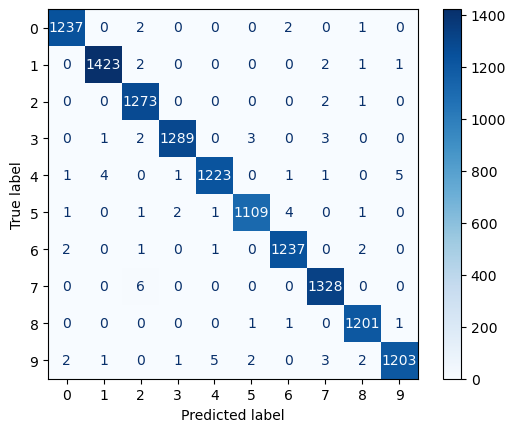

In [27]:
ConfusionMatrixDisplay.from_predictions(y_test_val, y_pred, cmap=plt.cm.Blues)

**Prediction**

In [28]:
model_1_pred = model_1.predict(X_test)
model_2_pred = model_2.predict(X_test)
model_3_pred = model_3.predict(X_test)

f = lambda x: np.argmax(x)

y_1_pred = np.fromiter((f(i) for i in model_1_pred), np.int64)
y_2_pred = np.fromiter((f(i) for i in model_2_pred), np.int64)
y_3_pred = np.fromiter((f(i) for i in model_3_pred), np.int64)

875/875 [==============================] - 16s 18ms/step


In [31]:
y_pred = np.array([y_1_pred, y_2_pred, y_3_pred])
y_pred = np.transpose(y_pred, (1, 0))
y_pred = stats.mode(y_pred, axis=1)[0]
y_pred = np.squeeze(y_pred)

**Export**

In [32]:
df_submit = pd.DataFrame({'ImageId' :  range(1, 28001), 'Label' : y_pred})
df_submit

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
